### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read the data

In [2]:
data = pd.read_csv(r"E:\Downloads\Fake News Prediction - cgrinfo\news.csv")

In [3]:
data.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
data.shape

(6335, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
data.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [7]:
data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [91]:
data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

### Preprocessing the Data

In [8]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [9]:
data.duplicated

<bound method DataFrame.duplicated of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalis

In [10]:
data.duplicated().sum()

0

In [11]:
data.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [14]:
labels = data.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [15]:
data['label'].value_counts(normalize=True) * 100

REAL    50.055249
FAKE    49.944751
Name: label, dtype: float64

In [16]:
# Having almost same percentage of FAKE and REAL news in the dataset.

In [19]:
data.reset_index(inplace=True)

In [20]:
data

,index,Unnamed: 0,title,text,label
0,0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...,...
6330,6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


<AxesSubplot:xlabel='label', ylabel='count'>

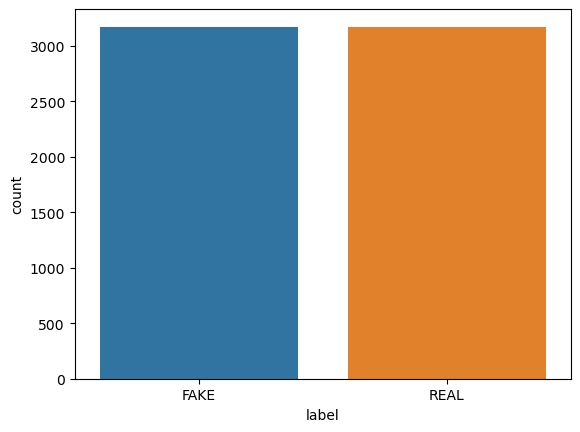

In [21]:
# balanced data imbalanced
# similler obserations

sns.countplot(data["label"])

In [23]:
dataset = data["title"][0]
dataset

'You Can Smell Hillary’s Fear'

In [24]:
# regular expression

import re

In [27]:
dataset = re.sub('[^a-zA-Z]', ' ', dataset)

In [28]:
dataset

'You Can Smell Hillary s Fear'

In [29]:
# changing to lower case
dataset = dataset.lower()
dataset

'you can smell hillary s fear'

In [30]:
# split the text

list = dataset.split()
list

['you', 'can', 'smell', 'hillary', 's', 'fear']

### Wordcloud

In [95]:
from wordcloud import WordCloud

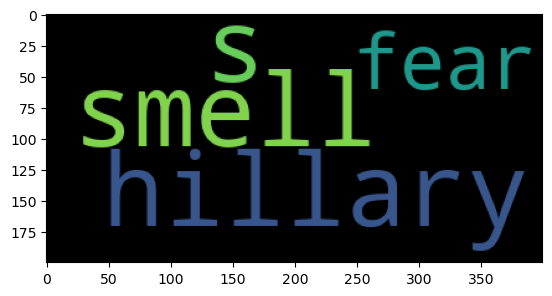

In [96]:
wordcloud = WordCloud().generate(dataset)
plt.imshow(wordcloud)

In [98]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


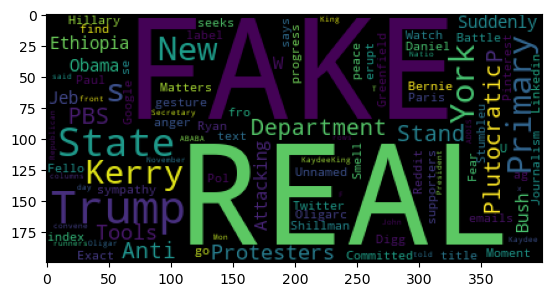

In [99]:
wordcloud = WordCloud().generate(str(data))
plt.imshow(wordcloud)

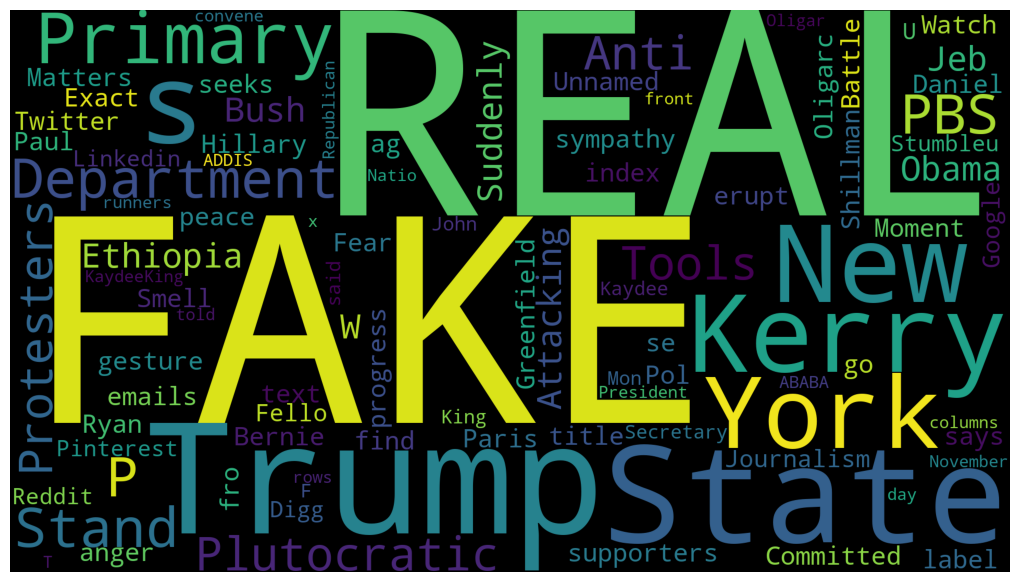

In [100]:
wordcloud = WordCloud(width=1920, height=1080).generate(str(data))
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [93]:
import nltk

In [34]:
# remove the stopwords from the text if any

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [36]:
ps = PorterStemmer()
review = [ps.stem(word) for word in list if word not in set(stopwords.words('english'))]

In [37]:
review

['smell', 'hillari', 'fear']

In [39]:
' '.join(review)

'smell hillari fear'

In [42]:
corpus = []

for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data["title"][i])
    review = review.lower()
    list = review.split()
    review = [ps.stem(word) for word in list if not word in set(stopwords.words('english'))]
    corpus.append(' '.join(review))

In [43]:
corpus[0]

'smell hillari fear'

In [44]:
corpus

['smell hillari fear',
 'watch exact moment paul ryan commit polit suicid trump ralli video',
 'kerri go pari gestur sympathi',
 'berni support twitter erupt anger dnc tri warn',
 'battl new york primari matter',
 'tehran usa',
 'girl horrifi watch boyfriend left facetim',
 'britain schindler die',
 'fact check trump clinton command chief forum',
 'iran reportedli make new push uranium concess nuclear talk',
 'three clinton iowa glimps fire elud hillari clinton campaign',
 'donald trump shockingli weak deleg game somehow got even wors',
 'strong solar storm tech risk today news oct video',
 'way america prepar world war',
 'trump take cruz lightli',
 'women lead differ',
 'shock michel obama hillari caught glamor date rape promot',
 'hillari clinton huge troubl america notic sick thing hidden pictur liberti writer news',
 'iran bill obama like',
 'chart explain everyth need know partisanship america',
 'slipperi slope trump propos ban muslim',
 'episod sunday wire hail deplor special g

In [46]:
# bag of words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [47]:
X.shape

(6335, 6884)

In [48]:
X[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
y = data["label"]

In [50]:
y.shape

(6335,)

In [51]:
# training set and test set splitting

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [55]:
x_train.shape

(4751, 6884)

In [56]:
x_test.shape

(1584, 6884)

In [57]:
y_train.shape

(4751,)

In [58]:
y_test.shape

(1584,)

In [77]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [79]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [80]:
y_pred = rfc.predict(x_test)

In [81]:
y_pred

array(['FAKE', 'REAL', 'REAL', ..., 'FAKE', 'FAKE', 'FAKE'], dtype=object)

In [82]:
rfc.score(x_train, y_train)

0.9997895179962113

array([[670, 135],
       [189, 590]], dtype=int64)

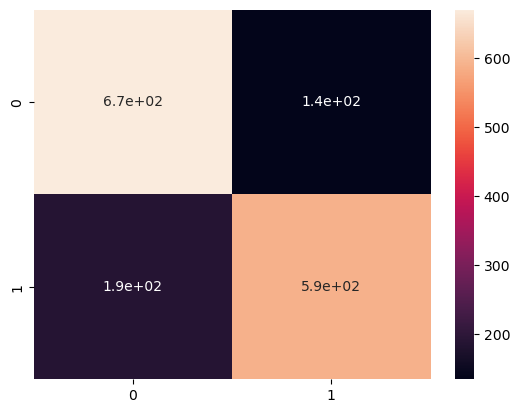

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
cm

In [84]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [85]:
classifier.fit(x_train, y_train)

MultinomialNB()

In [86]:
y_pred = classifier.predict(x_test)

In [87]:
y_pred

array(['FAKE', 'REAL', 'REAL', ..., 'FAKE', 'FAKE', 'FAKE'], dtype='<U4')

In [88]:
classifier.score(x_train, y_train)

0.9223321406019785

array([[629, 176],
       [103, 676]], dtype=int64)

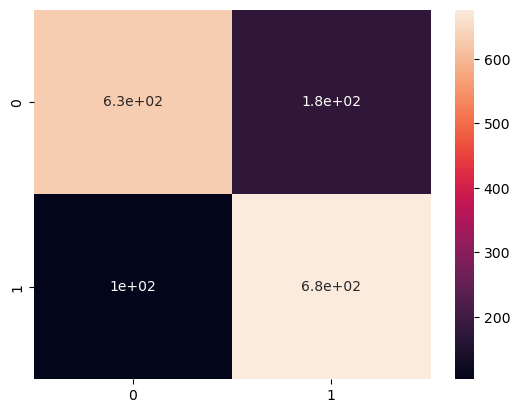

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
cm